In [7]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import os
from IPython.display import display # Import display from IPython.display

def text2ima(
    prompt: str,
    model_name: str = "runwayml/stable-diffusion-v1-5",
    num_inference_steps: int = 50,
    guidance_scale: float = 7.5,
    save_path: str = "la_imagen_generada.png"
):
    """
    Generate an image from a text prompt using Stable Diffusion.

    Parameters:
    - prompt (str): Descriptive text to generate the image
    - model_name (str): Hugging Face model to use (default is a popular Stable Diffusion model)
    - num_inference_steps (int): Number of denoising steps (default 50)
    - guidance_scale (float): How closely the image generation follows the prompt (default 7.5)
    - save_path (str): Path to save the generated image

    Returns:
    - PIL.Image: Generated image
    - str: Path where the image was saved
    """
    # Verificar si hay disponibilidad de GPU
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Cargar el pipeline
    try:
        pipe = StableDiffusionPipeline.from_pretrained(model_name)
        pipe = pipe.to(device)
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

    # Generar la imagen
    try:
        with torch.autocast(device):
            image = pipe(
                prompt,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale
            ).images[0]

        # Guardar la imagen
        os.makedirs(os.path.dirname(save_path) or '.', exist_ok=True)
        image.save(save_path)

        return image, save_path

    except Exception as e:
        print(f"Error generating image: {e}")
        return None, None


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Esta imagen se guardó en la_imagen_generada.png


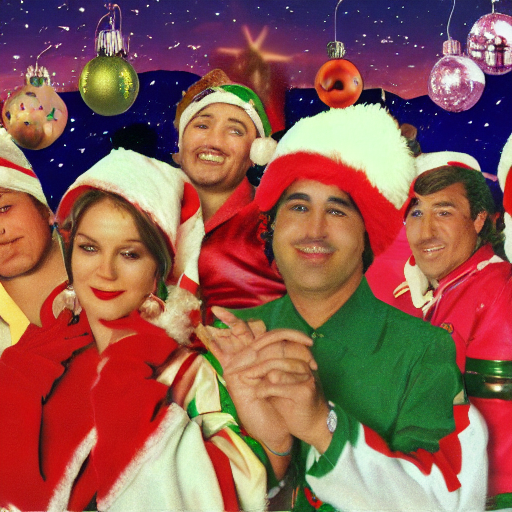

In [8]:
# Ejemplo de uso
if __name__ == "__main__":
    # Ejemplo de generación de una imagen
    prompt = "A Chirstmas eve in Saturn and listing to cumbia music in the year 2345"
    image, path = text2ima(prompt)

    if image and path:
        print(f"Esta imagen se guardó en {path}")
        # Mostramos la imagen
        display(image) # Use display instead of image.show()


# Podemos usar mas utility functions en esta sección
def list_available_models():
    """
    List some popular Stable Diffusion models from Hugging Face.
    Note: This is a curated list and not exhaustive.
    """
    return [
        "runwayml/stable-diffusion-v1-5",
        "CompVis/stable-diffusion-v1-4",
        "stabilityai/stable-diffusion-xl-base-1.0",
        "prompthero/openjourney-v4"
    ]
!pip install torch diffusers transformers accelerate pillow